In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from dsn.train_dsn import train_dsn
from dsn.util.systems import Linear2D
from dsn.util.dsn_util import get_savedir
from dsn.util.plot_util import assess_constraints, plot_opt, dsn_pairplots


D = 4
latent_dynamics = None;
TIF_flow_type = 'PlanarFlow';
elem_mult_flow = True;
nlayers = 10
arch_dict = {'D':D, \
             'latent_dynamics':latent_dynamics, \
             'elem_mult_flow':elem_mult_flow, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};
# multivariate normal initialization variance
sigma_init = 1.0
random_seed = 1

# create an instance of the 2D linear system class, with free parameter A,
# tau = 1.0, and behavior of interest 'oscillation'.
fixed_params = {'tau':1.0};

# Specify desired mean and variance for the real and imaginary
# components of the first eigenvalue.
behavior_type = 'oscillation'
f = 2.0; # 2 Hz
means = np.array([0.0, 2*np.pi*f])
variances = np.array([1.0, 1.0])
behavior = {'type':behavior_type, 'means':means, 'variances':variances}

system = Linear2D(fixed_params, behavior)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
print(system.D)
print(system.z_labels)

4
['$a_1$', '$a_2$', '$a_3$', '$a_4$']


In [4]:
# optimization hyperparams
k_max = 25
batch_size = 1000;
c_init_order = -2
lr_order = -3


In [5]:
train_dsn(system, batch_size, arch_dict, \
          k_max=k_max, sigma_init=sigma_init, \
          c_init_order=c_init_order, lr_order=lr_order,\
          random_seed=random_seed, min_iters=5000, \
          max_iters=10000, check_rate=100, dir_str='test')

Making directory data/inits/D=4_M_10P_sigma=1.00_rs=1/


/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


KeyboardInterrupt: 

No handles with labels found to put in legend.


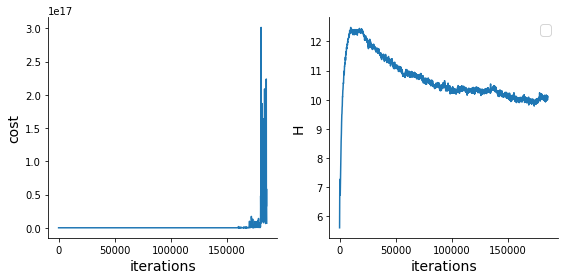

No handles with labels found to put in legend.


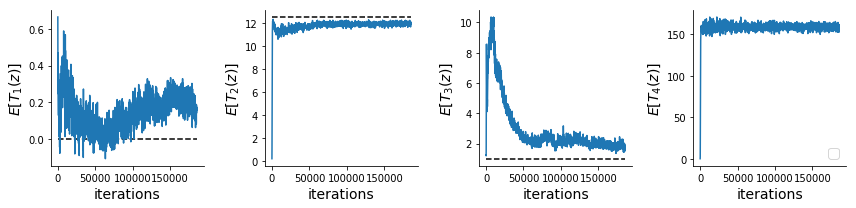

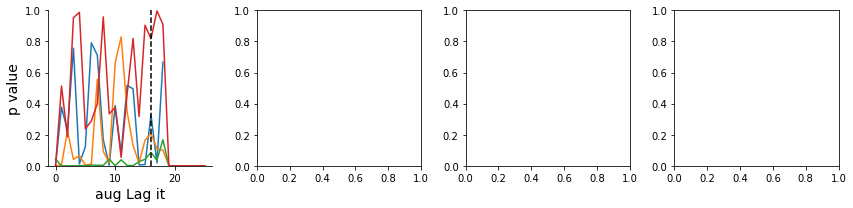

[<Figure size 576x288 with 2 Axes>,
 <Figure size 864x216 with 4 Axes>,
 <Figure size 864x216 with 4 Axes>]

In [5]:
basedir = os.getcwd()
savedir = basedir + '/' + get_savedir(system, flow_dict, \
                                   sigma_init, lr_order, \
                                   c_init_order, random_seed, 
                                   dir_str='test')
fname = savedir + 'results.npz'
plot_opt([fname], [''])

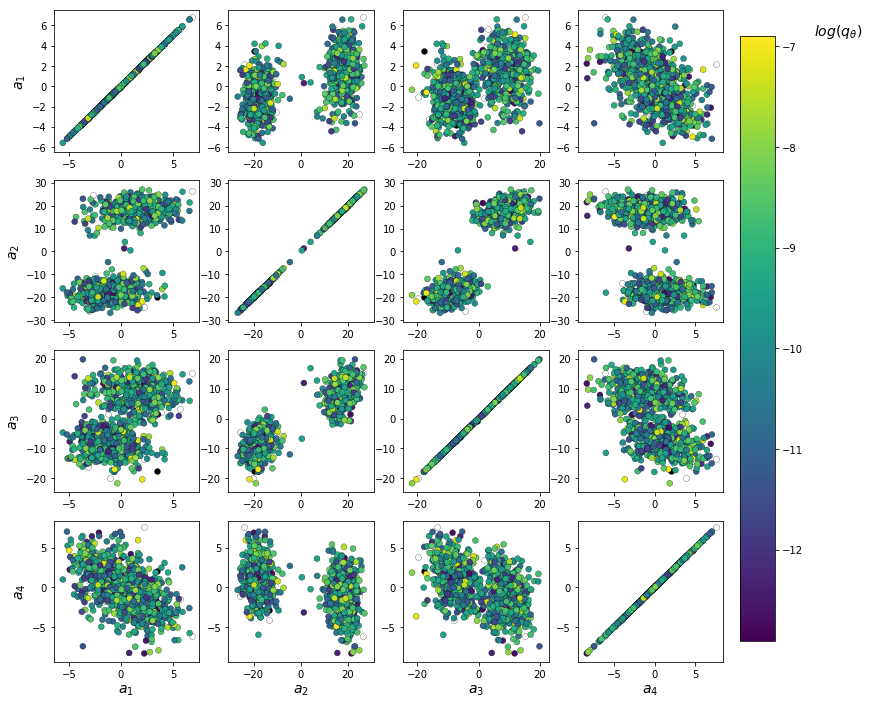

[<Figure size 864x864 with 17 Axes>]

In [8]:
k_max = 25
alpha = 0.05
p_values, AL_final_its = assess_constraints([fname], alpha, k_max, system.num_suff_stats)
dsn_pairplots([fname], 'zs', system, system.D, f_str='identity', \
                c_str='log_q_z', legendstrs=[], AL_final_its=AL_final_its, \
                fontsize=14, ellipses=False, mu=None, \
                pfname='temp1.png')

Assuming T(x) = [first moments, second moments].
Setting D = |T(x)|/2.


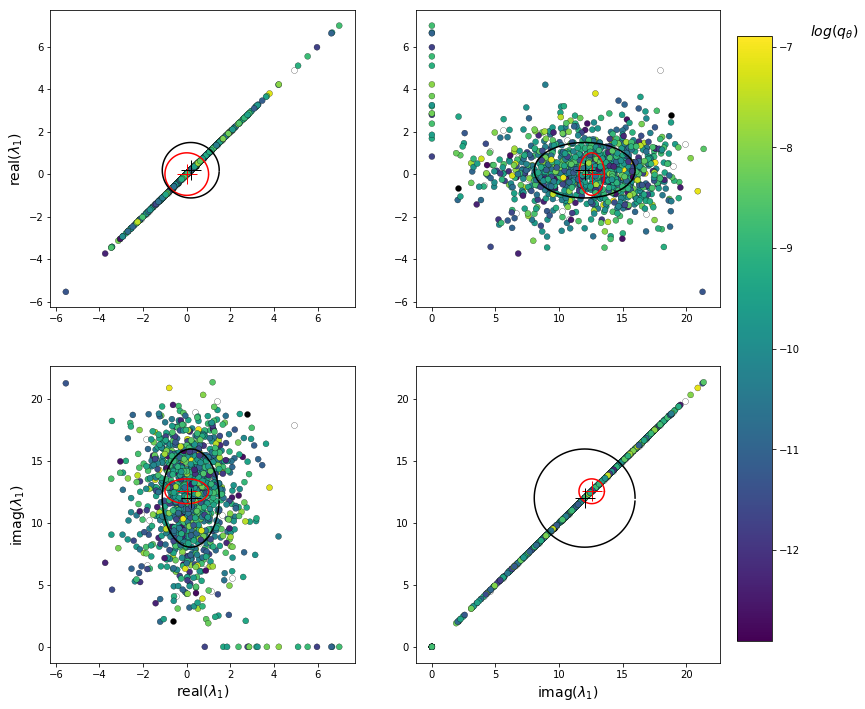

[<Figure size 864x864 with 5 Axes>]

In [22]:
dsn_pairplots([fname], 'T_xs', system, 1000, f_str='identity', \
                c_str='log_q_z', legendstrs=[], AL_final_its=AL_final_its, \
                fontsize=14, ellipses=True, \
                pfname='temp.png')

In [ ]:
# need to update T_x_labels and behavior documentation for system and linear_2D